This program predicts if a passenger will survive on the titanic

##**Import The Pachages**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##**Load The Dataset**

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
# Print the first 10 rows of the dataset
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


##**Analyze The Data**

In [5]:
# overview of the dataset
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


The dataset contains 891 rows and 15 columns

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Count the number of people that survived
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


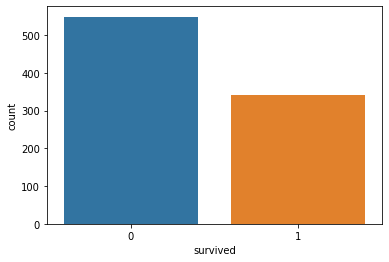

In [8]:
# Visualize the survived column
sns.countplot(titanic['survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

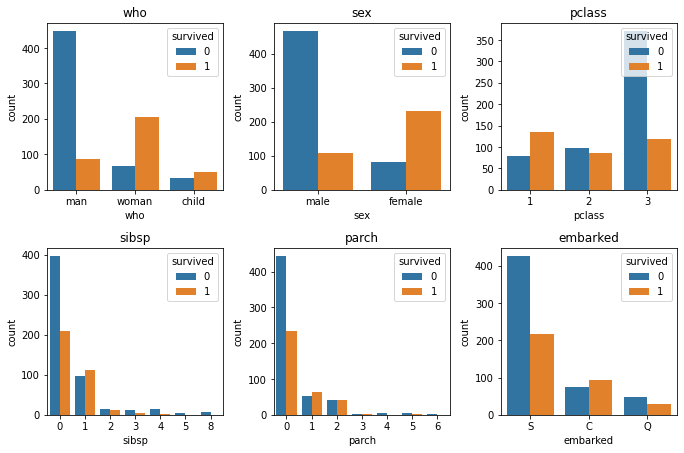

In [9]:
# visualize the count of survivors for different columns

cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']
n_rows = 2
n_cols = 3

# the subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize= (n_cols*3.2, n_rows*3.2))


for r in range(n_rows):
  for c in range(n_cols):
     
     i = n_cols * r + c      #index to go through the number of columns
     ax = axs[r][c]          #show where to position each subplot 
     
     sns.countplot(titanic[cols[i]], hue=titanic['survived'], ax=ax)
     ax.set_title(cols[i])
     ax.legend(title='survived', loc='upper right')

plt.tight_layout()

Following points can be concluded from the subplots:


*   Male has the least chances of survival
*   The passenger from the third class is the least likely to survive
*   A passenger without a parent or child is least likely to survive
*   A person onboarding from Queenstown has the highest chance of survival







In [10]:
# Survival rate by sex
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Only 18.89% of the total number of males present on the ship survived while the survival rate for the female was 74.2%

In [11]:
# survival rate by sex and class
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


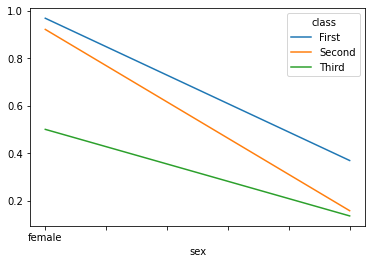

In [12]:
titanic.pivot_table('survived', index='sex', columns='class').plot()

Following points can be summed up from the above pivot table:


*   The chances of survival for female passenger is highest for the first class (96.8%) and the least in the third class (50%)
*   For the male passenger the chances of survival is as such low. Only 36.9% male passengers survived from first class and only 13.5% survived from the third class



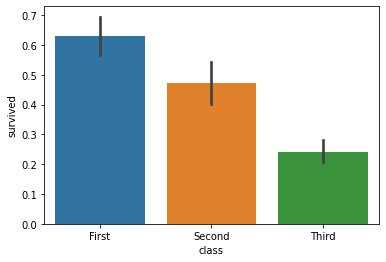

In [13]:
# Survival rate of each class
sns.barplot(x='class', y='survived', data=titanic)

In general the survival rate of the passengers in the first class have higher survival rate than the other two and the third class have the lowest survival rate.

In [14]:
# Survival rate by sex, age and class
age = pd.cut(titanic['age'], [0,18,40,80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 40]  0.979167  0.914894  0.480000
       (40, 80]  0.961538  0.846154  0.111111
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 40]  0.478261  0.063492  0.146199
       (40, 80]  0.280000  0.095238  0.064516

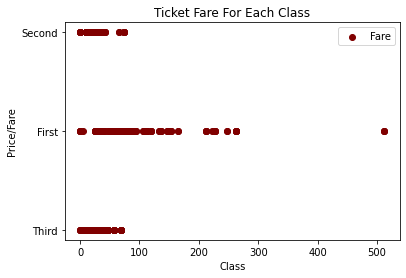

In [15]:
 # Prices paid by each class
 plt.scatter(titanic['fare'], titanic['class'], color='maroon', label= 'Fare')
 plt.xlabel('Class')
 plt.ylabel('Price/Fare')
 plt.title('Ticket Fare For Each Class')
 plt.legend()
 plt.show()

##**Data Preprocessing**

In [16]:
# Count the empty values in each columns
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [18]:
# Remove redundant columns
titanic = titanic.drop(['alive', 'embark_town', 'deck', 'class', 'who', 'alone', 'adult_male'], axis=1)

# Remove the rows with the missing values
titanic = titanic.dropna(subset=['embarked', 'age'])

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [20]:
titanic.shape

(712, 8)

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Encode the sex column
titanic.iloc[:,2] = labelencoder.fit_transform(titanic.iloc[:,2])

# Encode the embarked column
titanic.iloc[:,7] = labelencoder.fit_transform(titanic.iloc[:,7])

In [22]:
titanic['sex'].unique()

array([1, 0])

In [23]:
titanic['embarked'].unique()

array([2, 0, 1])

In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    int64  
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.1 KB


Sex and Embarked column has been encoded. Now all the columns has numeric data types


## **Model Building**

In [25]:
# Split the dataset into independent x and  and depedent y variable
x = titanic.iloc[:,1:8].values      # columns from 2 to last
y = titanic.iloc[:,0].values        # The supervised column

In [26]:
# Split the dataset into training and testing data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [27]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [28]:
# Use Machine Learning Models

def models(x_train, y_train):

  # Use Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(x_train, y_train)

  # Use KNN Model
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
  knn.fit(x_train, y_train)

  # Use SVC (linear kernel) 
  from sklearn.svm import SVC
  svc_lin = SVC(kernel='linear', random_state=0)
  svc_lin.fit(x_train, y_train)

  # Use SVC (RBF Kernel)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel='rbf', random_state=0)
  svc_rbf.fit(x_train, y_train)

  # Use GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(x_train, y_train)

  # Use Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  d_tree = DecisionTreeClassifier(criterion='entropy', random_state = 0)
  d_tree.fit(x_train, y_train)

  # Use the Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=0)
  forest.fit(x_train, y_train)

  # Get the training accuracy for each model
  print('[0]Logistic Regression Training Accuracy: ', log.score(x_train, y_train))
  print('[0]KNN Training Accuracy: ', knn.score(x_train, y_train))
  print('[0]SVC Linear Training Accuracy: ', svc_lin.score(x_train, y_train))
  print('[0]SVC RBF Training Accuracy: ', svc_rbf.score(x_train, y_train))
  print('[0]Gaissian Training Accuracy: ', gauss.score(x_train, y_train))
  print('[0]Decision Tree Classifier Training Accuracy: ', d_tree.score(x_train, y_train))
  print('[0]Random Forest Classifier Training Accuracy: ', forest.score(x_train, y_train))

  return log, knn, svc_lin, svc_rbf, gauss, d_tree, forest

In [29]:
model = models(x_train, y_train)

[0]Logistic Regression Training Accuracy:  0.7978910369068541
[0]KNN Training Accuracy:  0.8664323374340949
[0]SVC Linear Training Accuracy:  0.7768014059753954
[0]SVC RBF Training Accuracy:  0.8506151142355008
[0]Gaissian Training Accuracy:  0.8031634446397188
[0]Decision Tree Classifier Training Accuracy:  0.9929701230228472
[0]Random Forest Classifier Training Accuracy:  0.9753954305799648


So the Decision Tree Classifier has the highest accuracy of 99.3% followed by Random Forest Classifier with the accuracy of 97.5%.

In [30]:
# Confusion matrix and accuracy for all the models on the test data
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  cm = confusion_matrix(y_test, model[i].predict(x_test))

  # Extract True Negative, False Positive, False Negative, True Positive
  TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()

  test_score = (TP + TN) / (TN + FP + FN + TP)

  print(cm)
  print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
  print()


[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392"



Here the best testing accuracy is of the model 6 which is Random Forest Classifier. This model worked 97.54% accurately on the training data and 83.9% accurately on the testing data.

In [31]:
# Get Feature importances
forest = model[6]
importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


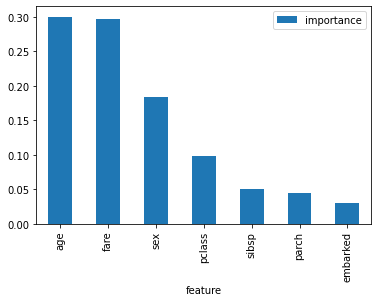

In [32]:
# Visualize the importances
importances.plot.bar()

In [33]:
# print the prediction of the Random Classifier Model
pred = model[6].predict(x_test)
print(pred)
print()

# Print the actual value
print(y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    int64  
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.1 KB


In [35]:
my_survival = [[1, 1, 25, 0, 4, 100, 1]]

# Scaling my survival
my_survival_scaled = sc.fit_transform(my_survival)

# Prediction of my survival using Random Forest Classifier
pred = model[6].predict(my_survival_scaled)
print(pred)

if pred == 0:
  print('Sorry! You did not survive')
else:
  print('Yeah! You survived')

[0]
Sorry! You did not survive
